**Importamos librerías**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Análisis inicial**


**Traemos el dataset**

In [6]:
fraud_df = pd.read_csv("fraud_detection.csv")
fraud_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


**Cantidad de registros**

In [11]:
fraud_df.shape

(6362620, 11)

**Info del df - Identificamos el tipo de datos**

In [7]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
fraud_df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6362620.0,2.433972e+02,1.423320e+02,1.0,156.00,239.000,3.350000e+02,7.430000e+02
amount,6362620.0,1.798619e+05,6.038582e+05,0.0,13389.57,74871.940,2.087215e+05,9.244552e+07
oldbalanceOrg,6362620.0,8.338831e+05,2.888243e+06,0.0,0.00,14208.000,1.073152e+05,5.958504e+07
newbalanceOrig,6362620.0,8.551137e+05,2.924049e+06,0.0,0.00,0.000,1.442584e+05,4.958504e+07
oldbalanceDest,6362620.0,1.100702e+06,3.399180e+06,0.0,0.00,132705.665,9.430367e+05,3.560159e+08
newbalanceDest,6362620.0,1.224996e+06,3.674129e+06,0.0,0.00,214661.440,1.111909e+06,3.561793e+08
isFraud,6362620.0,1.290820e-03,3.590480e-02,0.0,0.00,0.000,0.000000e+00,1.000000e+00
isFlaggedFraud,6362620.0,2.514687e-06,1.585775e-03,0.0,0.00,0.000,0.000000e+00,1.000000e+00


**Descripción de las variables**

In [10]:
'''Descripción de las Variables
• step: Unidad de tiempo (1 step equivale a 1 hora).
• type: Tipo de transacción en línea.
• amount: Monto de la transacción.
• nameOrig: Cliente que inicia la transacción.
• oldbalanceOrg: Saldo del cliente antes de la transacción.
• newbalanceOrig: Saldo del cliente después de la transacción.
• nameDest: Destinatario de la transacción.
• oldbalanceDest: Saldo inicial del destinatario antes de la transacción.
• newbalanceDest: Nuevo saldo del destinatario después de la transacción.
• isFraud: Indicador de transacción fraudulenta (marcado como 1 si es fraudulenta).
• isFlaggedFraud: Indicador de transacción marcada por un sistema de alerta.'''

'Descripción de las Variables\n• step: Unidad de tiempo (1 step equivale a 1 hora).\n• type: Tipo de transacción en línea.\n• amount: Monto de la transacción.\n• nameOrig: Cliente que inicia la transacción.\n• oldbalanceOrg: Saldo del cliente antes de la transacción.\n• newbalanceOrig: Saldo del cliente después de la transacción.\n• nameDest: Destinatario de la transacción.\n• oldbalanceDest: Saldo inicial del destinatario antes de la transacción.\n• newbalanceDest: Nuevo saldo del destinatario después de la transacción.\n• isFraud: Indicador de transacción fraudulenta (marcado como 1 si es fraudulenta).\n• isFlaggedFraud: Indicador de transacción marcada por un sistema de alerta.'

**Identificar cuantos valores nulos hay en el df**

In [ ]:
#cauntos valores nulos hay en cada columna
fraud_df.isnull().sum().sort_values(ascending=False)

#no hay valores nulos en el dataset

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

**Análisis de relaciones entre variables**

In [22]:
# Distribución del tipo de transacción
print(fraud_df['type'].value_counts(normalize=True))

print ("------------------------")

# Porcentaje de fraudes
print(fraud_df['isFraud'].value_counts(normalize=True))

print ("------------------------")

# Porcentaje de transacciones que tienen alerta como sospechosas
print(fraud_df['isFlaggedFraud'].value_counts(normalize=True))


type
CASH_OUT    0.351663
PAYMENT     0.338146
CASH_IN     0.219923
TRANSFER    0.083756
DEBIT       0.006512
Name: proportion, dtype: float64
------------------------
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64
------------------------
isFlaggedFraud
0    0.999997
1    0.000003
Name: proportion, dtype: float64


In [17]:
# Cruce entre tipo de transacción y fraude
pd.crosstab(fraud_df['type'], fraud_df['isFraud'], normalize='index') * 100

# Cruce entre fraude real y transacción marcada como sospechosa
pd.crosstab(fraud_df['isFraud'], fraud_df['isFlaggedFraud'], normalize='index') * 100


isFlaggedFraud,0,1
isFraud,,
0,100.000000,0.000000
1,99.805187,0.194813


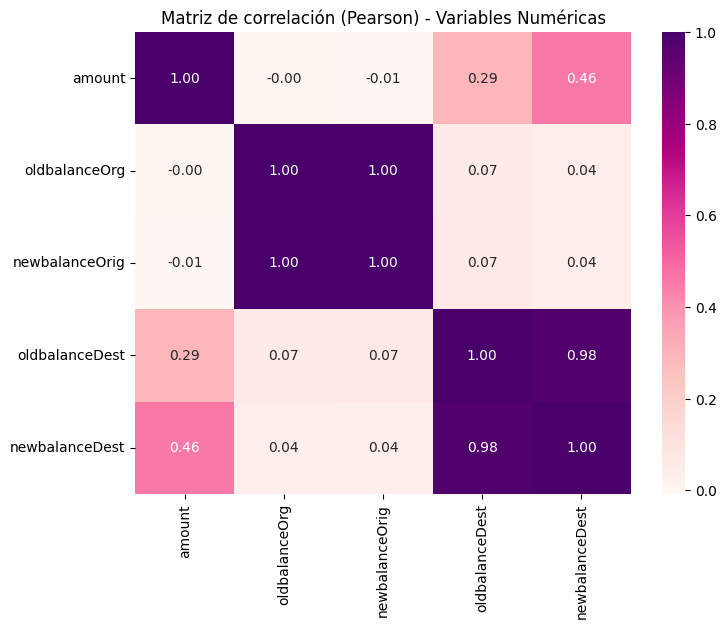

In [20]:

num_vars = ["amount", "oldbalanceOrg", "newbalanceOrig",
            "oldbalanceDest", "newbalanceDest"]

corr = fraud_df[num_vars].corr(method="pearson")

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="RdPu", fmt=".2f")
plt.title("Matriz de correlación (Pearson) - Variables Numéricas")
plt.show()


In [23]:
#El siguiente análisis es de CHATGPT, porfa revisar todo antes de mandar, que no haya nada incorrecto y si se ven que hay más cositas agregarlas: 


Al revisar el conjunto de datos fraud_df se identificaron los siguientes aspectos relevantes:

**1. Distribución de tipos de transacción**

Las operaciones más frecuentes corresponden a CASH_OUT (35.2%) y PAYMENT (33.8%).

CASH_IN (22%) también tiene una participación significativa.

TRANSFER (8.4%) y DEBIT (0.6%) son minoritarias.
Esto indica que la mayoría de las transacciones corresponden a retiros de dinero o pagos, lo cual es consistente con el comportamiento esperado en operaciones financieras.

**2. Incidencia del fraude**

Únicamente el 0.13% de las transacciones son fraudulentas, evidenciando que el conjunto de datos está altamente desbalanceado.

Este comportamiento refleja la realidad: los fraudes son eventos poco comunes, lo cual plantea un reto en el análisis y modelado.

3. Alertas del sistema (isFlaggedFraud)

Solo 0.0003% de las transacciones fueron marcadas como sospechosas por el sistema.

Al comparar con el indicador real de fraude:

Para transacciones no fraudulentas, el 100% no fueron marcadas.

Para transacciones fraudulentas, apenas el 0.2% fue señalado como sospechoso.
Esto muestra que el sistema de alertas casi nunca detecta fraudes reales, lo que limita fuertemente su utilidad.

**5. Correlaciones entre variables numéricas**

Existe correlación perfecta (≈1.0) entre oldbalanceOrg y newbalanceOrig, así como entre oldbalanceDest y newbalanceDest. Esto evidencia redundancia entre variables, ya que representan prácticamente la misma información.

El monto (amount) se relaciona moderadamente con newbalanceDest (0.46), lo que es lógico porque el monto transferido impacta en el saldo final del destinatario.

En general, los saldos de origen y destino muestran relaciones muy fuertes, lo cual sugiere que algunas variables podrían simplificarse sin perder demasiada información.

# **Visualizaciones**

**Histogramas de variables numéricas**


Porfa acordarse preguntar al profe si esto lo pasamos a log porque se ve HORRIBLEEE

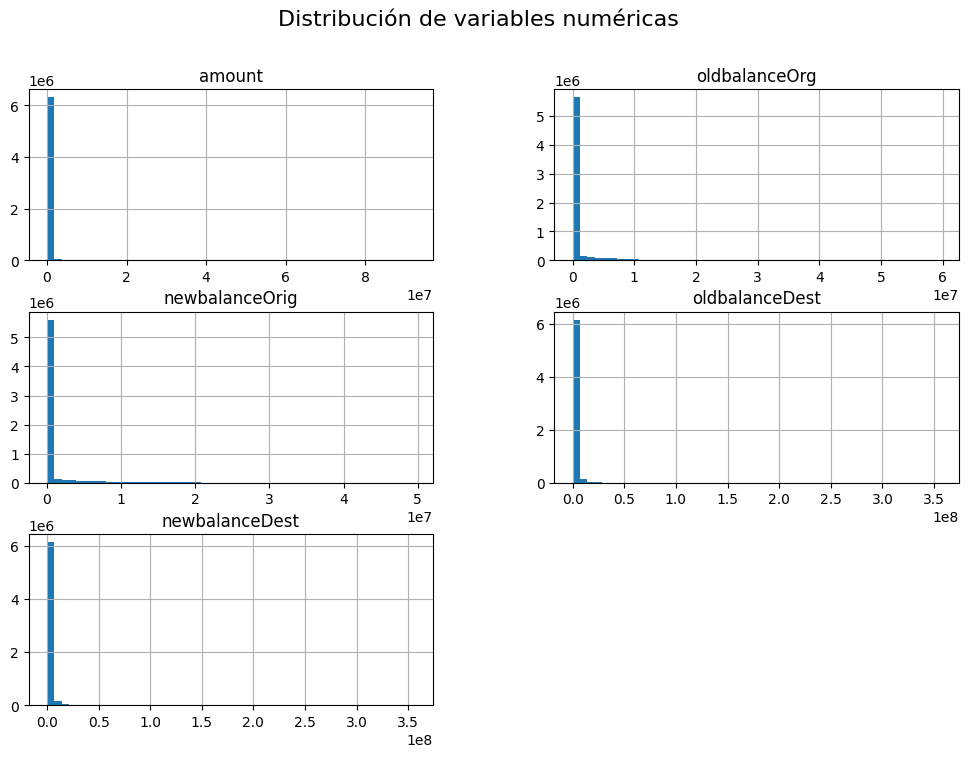

In [26]:
num_vars = ["amount", "oldbalanceOrg", "newbalanceOrig",
            "oldbalanceDest", "newbalanceDest"]

fraud_df[num_vars].hist(bins=50, figsize=(12,8))
plt.suptitle("Distribución de variables numéricas", fontsize=16)
plt.show()

**Frecuencia de transacciones por tipo**

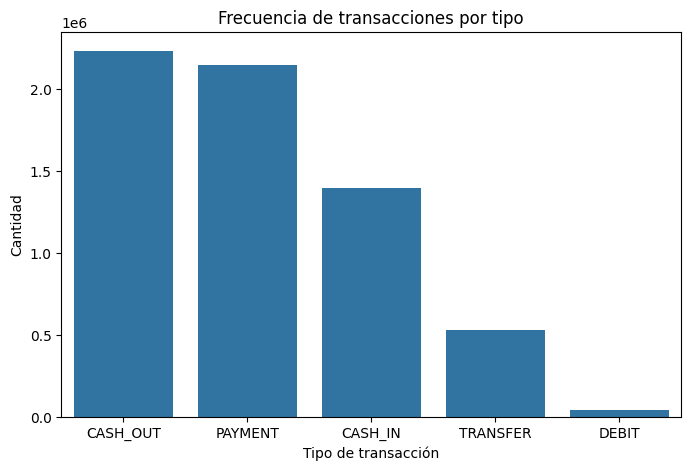

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(data=fraud_df, x="type", order=fraud_df["type"].value_counts().index)
plt.title("Frecuencia de transacciones por tipo")
plt.xlabel("Tipo de transacción")
plt.ylabel("Cantidad")
plt.show()

**Diferenciación entre si es fraude o no es fraude**

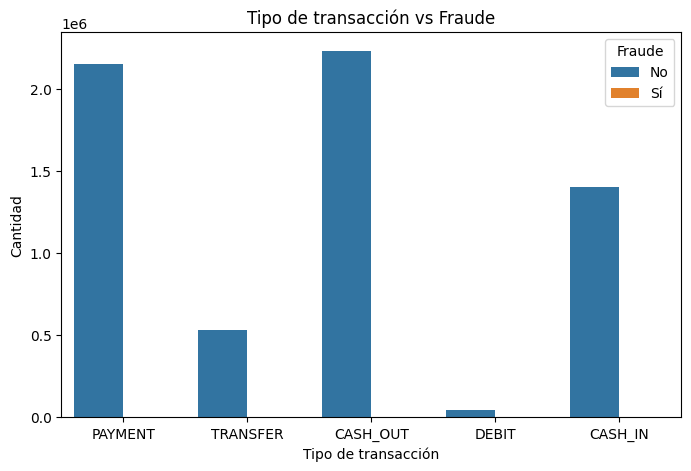

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(data=fraud_df, x="type", hue="isFraud")
plt.title("Tipo de transacción vs Fraude")
plt.xlabel("Tipo de transacción")
plt.ylabel("Cantidad")
plt.legend(title="Fraude", labels=["No", "Sí"])
plt.show()

**Evolución de las transacciones**

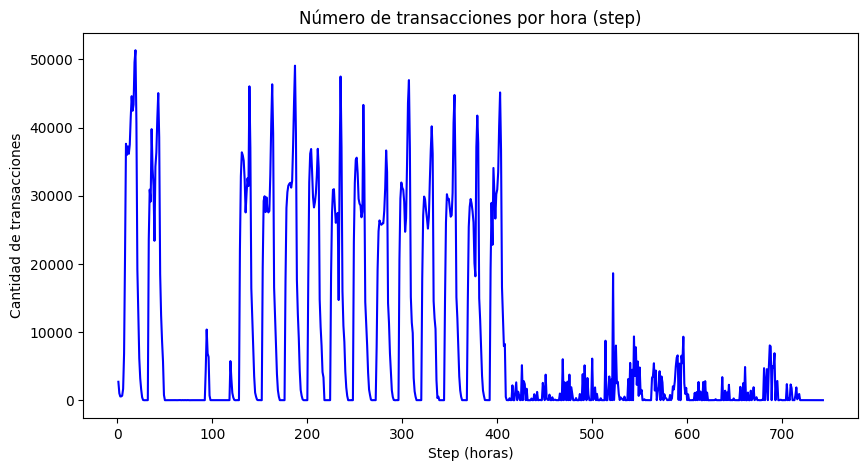

In [30]:
transacciones_por_hora = fraud_df.groupby("step").size()

plt.figure(figsize=(10,5))
plt.plot(transacciones_por_hora, color="blue")
plt.title("Número de transacciones por hora (step)")
plt.xlabel("Step (horas)")
plt.ylabel("Cantidad de transacciones")
plt.show()


**Fraudes a lo largo del tiempo**

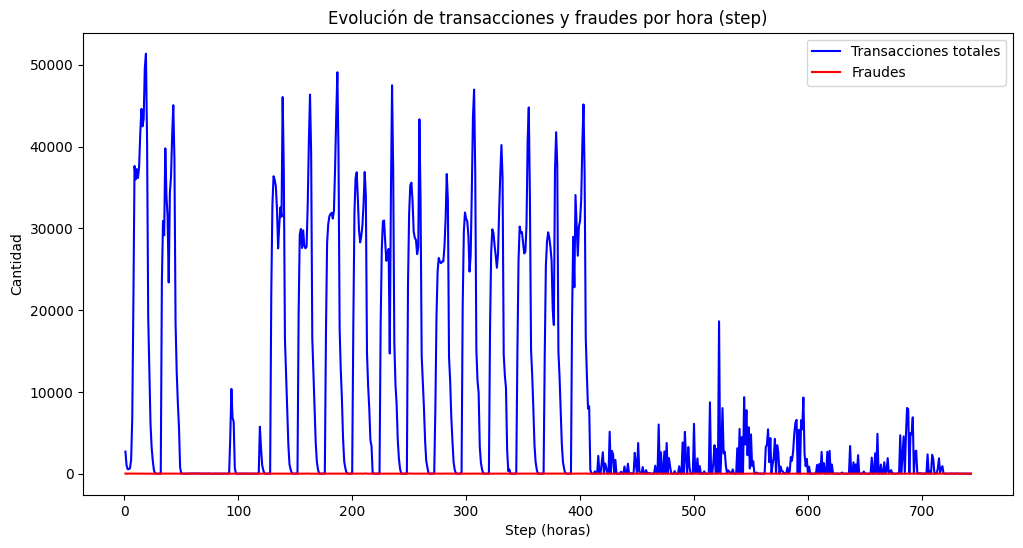

In [32]:
# Total de transacciones por hora
transacciones_por_hora = fraud_df.groupby("step").size()

# Total de fraudes por hora
fraudes_por_hora = fraud_df.groupby("step")["isFraud"].sum()

plt.figure(figsize=(12,6))
plt.plot(transacciones_por_hora, label="Transacciones totales", color="blue")
plt.plot(fraudes_por_hora, label="Fraudes", color="red")
plt.title("Evolución de transacciones y fraudes por hora (step)")
plt.xlabel("Step (horas)")
plt.ylabel("Cantidad")
plt.legend()
plt.show()

